In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from amstools import *

In [3]:
from tensorpotential.calculator import grace_fm, TPCalculator

[tensorpotential] Info: Environment variable TF_USE_LEGACY_KERAS is automatically set to '1'.


2026-02-27 15:05:11.668424: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1772201111.679571  693961 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1772201111.682957  693961 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1772201111.692076  693961 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1772201111.692084  693961 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1772201111.692085  693961 computation_placer.cc:177] computation placer alr

In [4]:
from amstools.thermodynamics import run_convex_hull_calculation, plot_convex_hull

In [5]:
from amstools.sources import fetch_structures, fetch_mp_reference_df

In [6]:
from ase.build import bulk

# Loading reference convex hull

In [7]:
cache_dir='../../1-AlLi-GRACE-2LAYER/0-data/AlLi_Materials_Project'

In [8]:
ref_df=fetch_mp_reference_df(['Al','Li'], 
                             # mp_api_key='XXXXX',  ## get from https://next-gen.materialsproject.org/api                         
                             max_atoms=32,
                             cache_dir=cache_dir)

In [9]:
ref_df

,name,ase_atoms,e_per_atom,e_formation_per_atom,e_chull_dist_per_atom
0,Al__mp-134,"(Atom('Al', [np.float64(0.0), np.float64(0.0),...",NaN,0.000000,0.000000
1,Al__mp-2647008,"(Atom('Al', [np.float64(0.0), np.float64(0.0),...",NaN,0.032078,0.032078
2,Al__mp-1183144,"(Atom('Al', [np.float64(0.0), np.float64(0.0),...",NaN,0.010481,0.010481
3,Li__mp-51,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",NaN,0.001672,0.001672
4,Li__mp-135,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",NaN,0.009651,0.009651
5,Li__mp-976411,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",NaN,0.005889,0.005889
6,Li__mp-1018134,"(Atom('Li', [np.float64(4.618009551014942), np...",NaN,0.000000,0.000000
7,Li__mp-1103107,"(Atom('Li', [np.float64(1.379696372079909), np...",NaN,0.055379,0.055379
8,Li__mp-1063005,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",NaN,0.015671,0.015671
9,Li__mp-10173,"(Atom('Li', [np.float64(-1.1807313597921131e-0...",NaN,0.005988,0.005988


In [10]:
struct_dict=fetch_structures(['Al','Li'], 
                             # mp_api_key=MP_API_KEY, 
                             max_atoms=32,
                             cache_dir=cache_dir)

## Compute convex hull for FINETUNED model

In [11]:
calc=TPCalculator("seed/1/final_model/")

2026-02-27 15:05:17.503155: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [12]:
pipeline_dict={}

In [13]:
df, pipeline_dict=run_convex_hull_calculation(structure_dict=struct_dict, calc=calc, pipeline_dict=pipeline_dict)

2026-02-27 15:05:19,806 - root - INFO - Processing structure 'Al__mp-134'
2026-02-27 15:05:19,806 - root - INFO - =======================
2026-02-27 15:05:19,807 - root - INFO - Step: optimization
Processing: optimized_structure (1 atom(s)):   0%|          | 0/1 [00:00<?, ?it/s]WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
I0000 00:00:1772201120.255381  693961 service.cc:152] XLA service 0x178743f0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1772201120.255416  693961 service.cc:160]   StreamExecutor device (0): Host, Default Version
2026-02-27 15:05:20.462958: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1772201121.993929  693961 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
Processing: optimized_s

Structure dataset: multiple unique compositions found, trying to construct convex hull


In [14]:
df

,name,ase_atoms,energy,energy_per_atom,equilibrium_volume,equilibrium_bulk_modulus,comp_dict,NUMBER_OF_ATOMS,comp_tuple,n_Al,c_Al,n_Li,c_Li,e_formation_per_atom,e_chull_dist_per_atom
0,Al__mp-134,"(Atom('Al', [np.float64(0.0), np.float64(0.0),...",-3.754462,-3.754462,16.483849,79.442413,{'Al': 1},1,"((Al, 1.0),)",1,1.000000,0,0.000000,0.000000,0.000000e+00
1,Al__mp-2647008,"(Atom('Al', [np.float64(0.0), np.float64(0.0),...",-7.441952,-3.720976,33.275084,73.733687,{'Al': 2},2,"((Al, 1.0),)",2,1.000000,0,0.000000,0.033486,3.348618e-02
2,Al__mp-1183144,"(Atom('Al', [np.float64(0.0), np.float64(0.0),...",-14.948925,-3.737231,66.280019,76.543333,{'Al': 4},4,"((Al, 1.0),)",4,1.000000,0,0.000000,0.017231,1.723099e-02
3,Li__mp-51,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",-1.914726,-1.914726,20.169837,14.842012,{'Li': 1},1,"((Li, 1.0),)",0,0.000000,1,1.000000,0.000000,3.040875e-17
4,Li__mp-135,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",-1.914011,-1.914011,20.191513,14.454276,{'Li': 1},1,"((Li, 1.0),)",0,0.000000,1,1.000000,0.000715,7.149314e-04
5,Li__mp-976411,"(Atom('Li', [np.float64(2.4295432453290517e-22...",-7.658686,-1.914671,80.602946,14.967850,{'Li': 4},4,"((Li, 1.0),)",0,0.000000,4,1.000000,0.000055,5.471100e-05
6,Li__mp-1018134,"(Atom('Li', [np.float64(4.573517499932563), np...",-5.744061,-1.914687,60.417254,15.034351,{'Li': 3},3,"((Li, 1.0),)",0,0.000000,3,1.000000,0.000039,3.926703e-05
7,Li__mp-1103107,"(Atom('Li', [np.float64(-0.3230603116041537), ...",-22.962681,-1.913557,241.415603,15.041938,{'Li': 12},12,"((Li, 1.0),)",0,0.000000,12,1.000000,0.001169,1.169468e-03
8,Li__mp-1063005,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",-5.704982,-1.901661,60.743305,14.396456,{'Li': 3},3,"((Li, 1.0),)",0,0.000000,3,1.000000,0.013066,1.306561e-02
9,Li__mp-10173,"(Atom('Li', [np.float64(-1.0154539679040286e-0...",-3.829433,-1.914717,40.228501,15.121350,{'Li': 2},2,"((Li, 1.0),)",0,0.000000,2,1.000000,0.000010,9.611894e-06


## Compute convex hull for "from scratch" model

In [15]:
calc_scr=TPCalculator("../../1-AlLi-GRACE-2LAYER/1-fit/seed/1/final_model/")

In [16]:
pipeline_dict_scr = {}

In [17]:
df_scr, pipeline_dict_scr=run_convex_hull_calculation(structure_dict=struct_dict, calc=calc_scr, pipeline_dict=pipeline_dict_scr)

2026-02-27 15:06:17,368 - root - INFO - Processing structure 'Al__mp-134'
2026-02-27 15:06:17,368 - root - INFO - =======================
2026-02-27 15:06:17,369 - root - INFO - Step: optimization
Processing: optimized_structure (1 atom(s)): 100%|██████████| 1/1 [00:02<00:00,  2.13s/it]
2026-02-27 15:06:19,496 - root - INFO - Step status: finished
2026-02-27 15:06:19,496 - root - INFO - =======================
2026-02-27 15:06:19,496 - root - INFO - =======================
2026-02-27 15:06:19,497 - root - INFO - Step: murnaghan
Processing: strain_1_1 (1 atom(s)): 100%|██████████| 11/11 [00:00<00:00, 35.86it/s]              
2026-02-27 15:06:19,807 - root - INFO - Job is done
2026-02-27 15:06:19,808 - root - INFO - Step status: finished
2026-02-27 15:06:19,808 - root - INFO - =======================
2026-02-27 15:06:19,808 - root - INFO - Processing structure 'Al__mp-2647008'
2026-02-27 15:06:19,809 - root - INFO - =======================
2026-02-27 15:06:19,809 - root - INFO - Step: op

Structure dataset: multiple unique compositions found, trying to construct convex hull


## Compute convex hull for foundation model GRACE-2L-OMAT-medium-ft-E

In [18]:
calc_fm=grace_fm("GRACE-2L-OMAT-medium-ft-E")

Unpacking model from 'https://ruhr-uni-bochum.sciebo.de/s/n9HB7SFxRbNFtSc/download' (local file: /pc2/users/u/usrtr200/.cache/grace/tmp.tar.gz) to /pc2/users/u/usrtr200/.cache/grace
GRACE model downloaded to /pc2/users/u/usrtr200/.cache/grace/GRACE-2L-OMAT-medium-ft-E
Model license: Academic Software License


In [19]:
pipeline_dict_fm = {}

In [20]:
df_fm, pipeline_dict_fm=run_convex_hull_calculation(structure_dict=struct_dict, calc=calc_fm, pipeline_dict=pipeline_dict_fm)

2026-02-27 15:07:35,562 - root - INFO - Processing structure 'Al__mp-134'
2026-02-27 15:07:35,563 - root - INFO - =======================
2026-02-27 15:07:35,563 - root - INFO - Step: optimization
Processing: optimized_structure (1 atom(s)): 100%|██████████| 1/1 [00:02<00:00,  2.31s/it]
2026-02-27 15:07:37,877 - root - INFO - Step status: finished
2026-02-27 15:07:37,877 - root - INFO - =======================
2026-02-27 15:07:37,878 - root - INFO - =======================
2026-02-27 15:07:37,878 - root - INFO - Step: murnaghan
Processing: strain_1_1 (1 atom(s)): 100%|██████████| 11/11 [00:00<00:00, 13.30it/s]              
2026-02-27 15:07:38,708 - root - INFO - Job is done
2026-02-27 15:07:38,709 - root - INFO - Step status: finished
2026-02-27 15:07:38,709 - root - INFO - =======================
2026-02-27 15:07:38,709 - root - INFO - Processing structure 'Al__mp-2647008'
2026-02-27 15:07:38,709 - root - INFO - =======================
2026-02-27 15:07:38,710 - root - INFO - Step: op

Structure dataset: multiple unique compositions found, trying to construct convex hull


# Compare convex hulls

{('Al',
  'Li'): <Axes: title={'center': 'Convex Hull: Al-Li'}, xlabel='Concentration of Li', ylabel='Formation energy (eV/atom)'>}

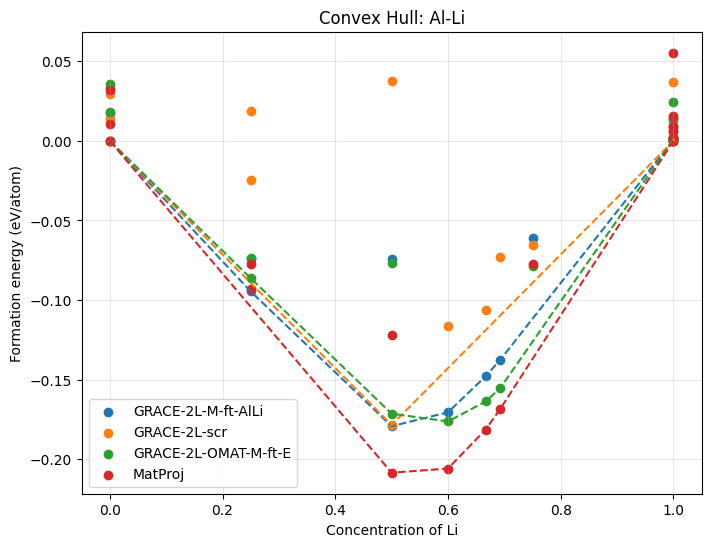

In [22]:
plot_convex_hull({"GRACE-2L-M-ft-AlLi":df, 
                  "GRACE-2L-scr":df_scr, 
                  "GRACE-2L-OMAT-M-ft-E":df_fm,
                  "MatProj":ref_df
                 })

As you can see, finetuned GRACE-2L-M-ft-AlLi model preserve the relative order of other phases, but got the LiAl phase spot-on.